In [3]:
# Project 2: Predicting Bike Rentals based on Weather and Time Factors

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set plotting style
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

# (1) Load the data
# Reading the train.csv file from the given path
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

# Display the first few rows of the data
print("Data Overview:")
print(train.head())



Data Overview:
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [4]:
# Display basic statistics
print("\nBasic Statistics:")
print(train.describe())



Basic Statistics:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.

In [5]:
# Display data information
print("\nData Information:")
print(train.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [6]:
# (2) Convert datetime column and extract date components
# Convert datetime column to datetime type
train['datetime'] = pd.to_datetime(train['datetime'])

# Extract year, month, day, hour, minute, second
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# Add day of week
train['dayofweek'] = train['datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Display the updated data
print("\nData after datetime extraction:")
print(train.head())


Data after datetime extraction:
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  dayofweek  
0       0 

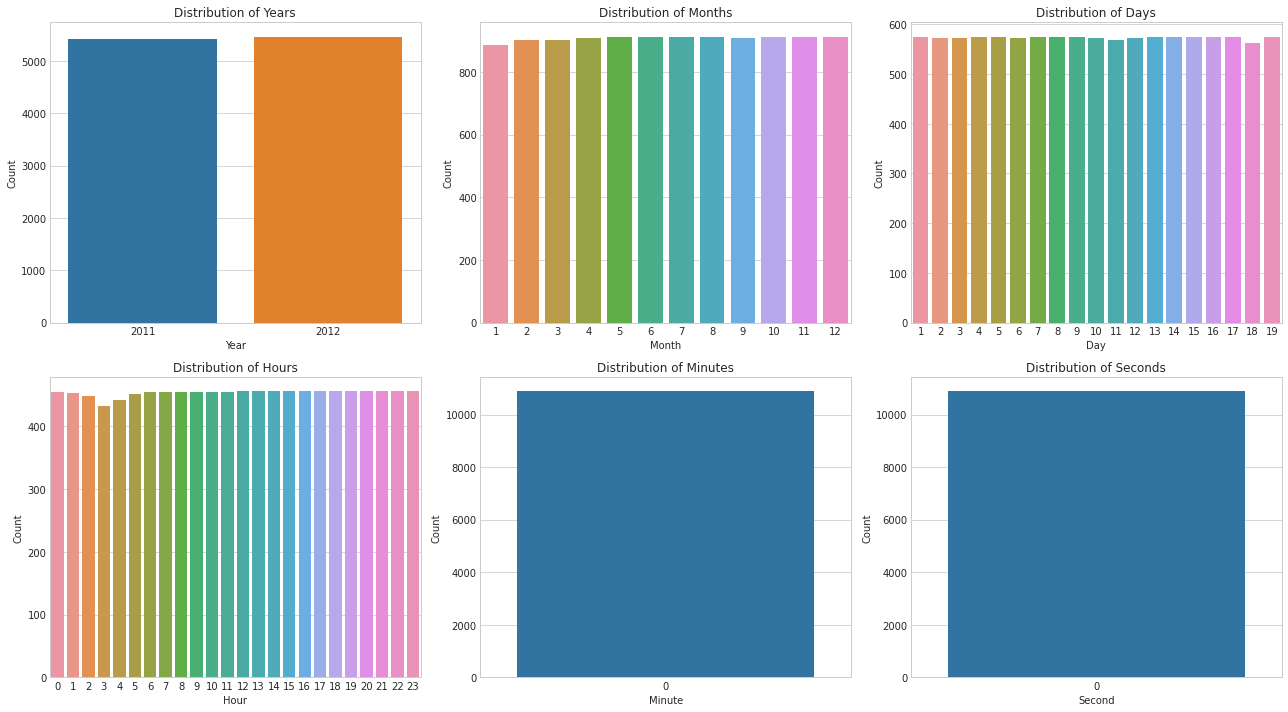

In [8]:
# (3) Visualize the distribution of date components
# Create a 2x3 subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Year count plot
sns.countplot(x='year', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Years')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Count')

# Month count plot
sns.countplot(x='month', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Months')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Count')

# Day count plot
sns.countplot(x='day', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Days')
axes[0, 2].set_xlabel('Day')
axes[0, 2].set_ylabel('Count')

# Hour count plot
sns.countplot(x='hour', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Hours')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Count')

# Minute count plot
sns.countplot(x='minute', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Minutes')
axes[1, 1].set_xlabel('Minute')
axes[1, 1].set_ylabel('Count')

# Second count plot
sns.countplot(x='second', data=train, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Seconds')
axes[1, 2].set_xlabel('Second')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()



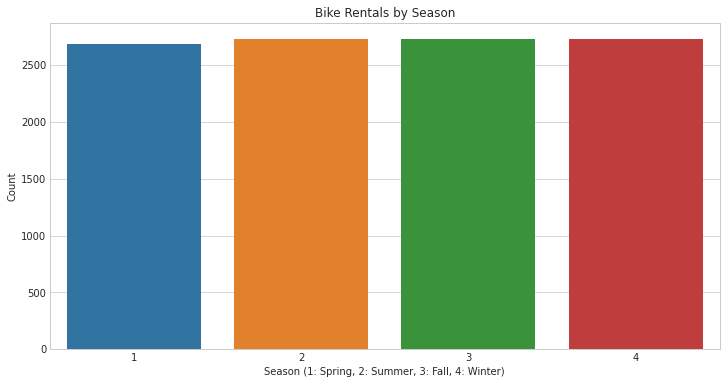

In [10]:
# Additional visualizations to understand data patterns
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=train)
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Count')
plt.show()



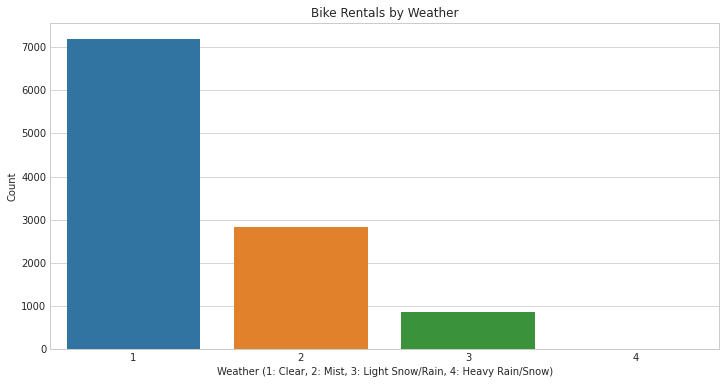

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weather', data=train)
plt.title('Bike Rentals by Weather')
plt.xlabel('Weather (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Count')
plt.show()


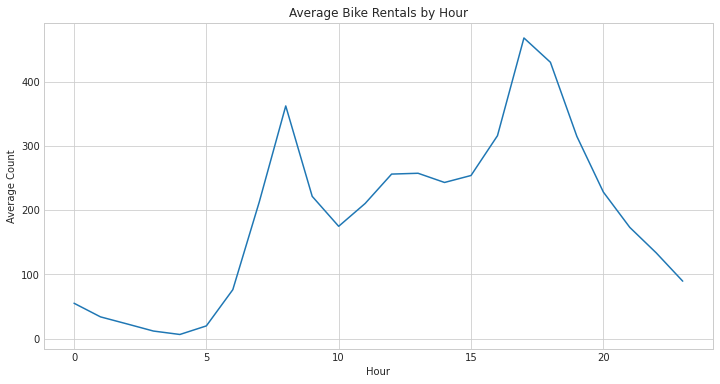

In [12]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=train, ci=None)
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.show()


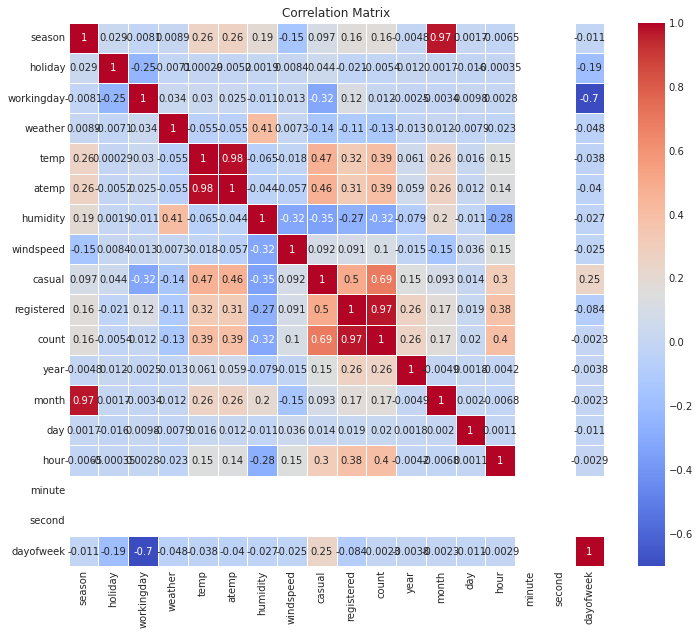

In [13]:

# Correlation between numeric features
plt.figure(figsize=(12, 10))
correlation = train.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# (4) Select X and y columns and split data
# Selecting feature columns for X (excluding casual and registered which are directly related to count)
# We're being thoughtful here about which features to include
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 
           'year', 'month', 'day', 'hour', 'dayofweek']]

# Target variable
y = train['count']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (8708, 13)
Testing set shape: (2178, 13)


In [16]:
# (5) Train LinearRegression model
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {model.coef_[i]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
season: -8.1696
holiday: -5.2904
workingday: 3.0897
weather: -5.1698
temp: 1.1422
atemp: 5.0355
humidity: -2.0320
windspeed: 0.5425
year: 82.6682
month: 10.1837
day: 0.2262
hour: 7.8652
dayofweek: 0.6760
Intercept: -166255.1234


In [17]:
# (6) Make predictions and calculate loss
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared for the test data
r2_test = model.score(X_test, y_test)
print(f"R-squared (Test): {r2_test:.4f}")



Mean Squared Error (MSE): 19940.44
Root Mean Squared Error (RMSE): 141.21
R-squared (Test): 0.3959


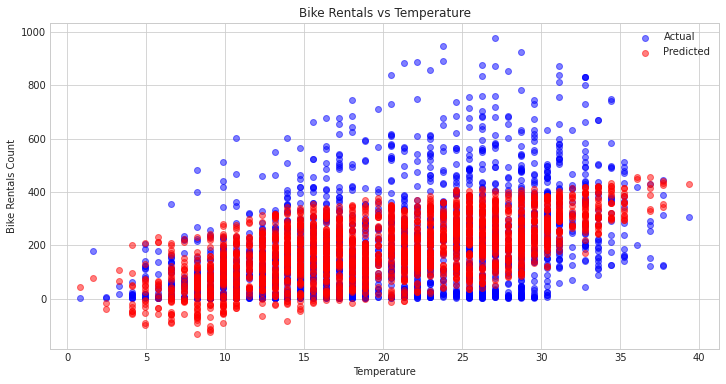

In [18]:
# (7) Visualize predictions vs. actual based on temp and humidity
# Create a DataFrame with test data and predictions for easier plotting
test_results = pd.DataFrame({
    'temp': X_test['temp'],
    'humidity': X_test['humidity'],
    'actual': y_test,
    'predicted': y_pred
})

# Scatter plot: Temperature vs. Count
plt.figure(figsize=(12, 6))
plt.scatter(test_results['temp'], test_results['actual'], alpha=0.5, label='Actual', color='blue')
plt.scatter(test_results['temp'], test_results['predicted'], alpha=0.5, label='Predicted', color='red')
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals Count')
plt.legend()
plt.grid(True)
plt.show()

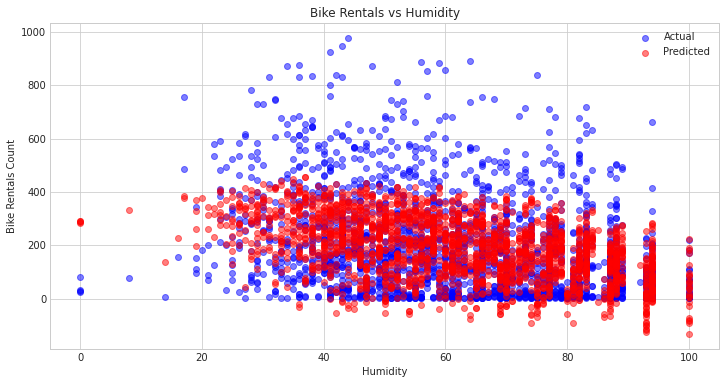

In [19]:
# Scatter plot: Humidity vs. Count
plt.figure(figsize=(12, 6))
plt.scatter(test_results['humidity'], test_results['actual'], alpha=0.5, label='Actual', color='blue')
plt.scatter(test_results['humidity'], test_results['predicted'], alpha=0.5, label='Predicted', color='red')
plt.title('Bike Rentals vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Bike Rentals Count')
plt.legend()
plt.grid(True)
plt.show()


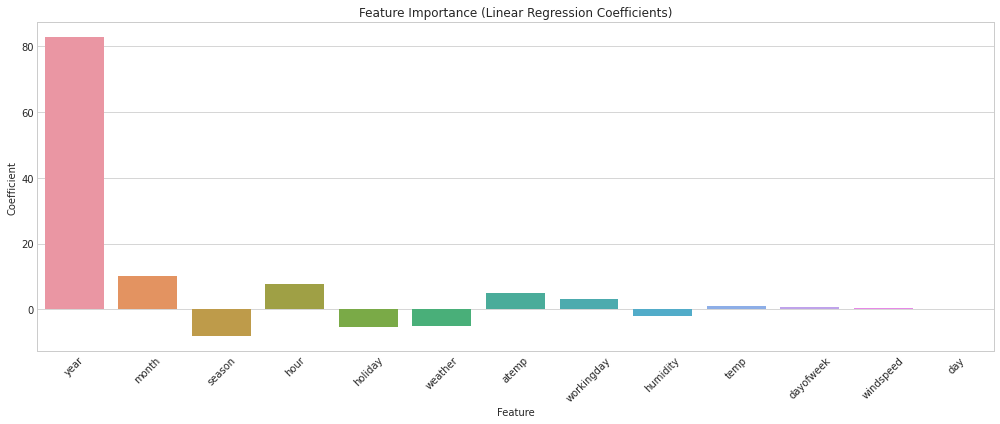

In [20]:
# Analyze feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x='Feature', y='Coefficient', data=feature_importance)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Predicted bike rentals on a nice Monday afternoon at 3 PM: 293 bikes


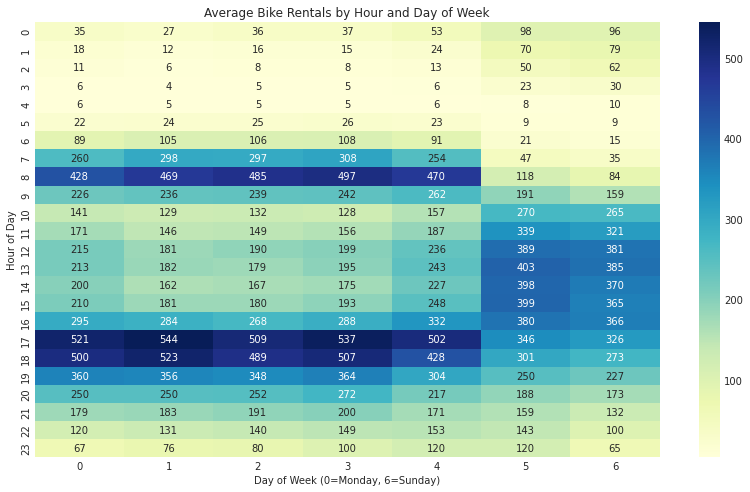

In [21]:
# Let's answer the question in the project title!
# "On a nice Monday afternoon at 3 PM, how many people are riding bikes?"
# Let's create a specific prediction for this scenario

# Define a nice Monday afternoon at 3 PM scenario
# Assume nice weather (clear, warm but not too hot, low humidity, light wind)
nice_monday = pd.DataFrame({
    'season': [2],  # Summer
    'holiday': [0],  # Not a holiday
    'workingday': [1],  # Monday is a working day
    'weather': [1],  # Clear weather
    'temp': [25],  # 25°C is a nice temperature
    'atemp': [25],  # Feel-like temperature
    'humidity': [50],  # Moderate humidity
    'windspeed': [10],  # Light wind
    'year': [2012],  # Using the same year as in the dataset
    'month': [6],  # June
    'day': [4],  # Just a placeholder
    'hour': [15],  # 3 PM
    'dayofweek': [0]  # Monday
})

# Make prediction
predicted_count = model.predict(nice_monday)[0]
print(f"\nPredicted bike rentals on a nice Monday afternoon at 3 PM: {int(predicted_count)} bikes")

# Analyze patterns by hour and day of week
plt.figure(figsize=(14, 8))
hourly_avg = train.groupby(['hour', 'dayofweek'])['count'].mean().unstack()
sns.heatmap(hourly_avg, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Bike Rentals by Hour and Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of Day')
plt.show()


In [22]:
print("\nConclusions:")
print("1. The model can predict bike rental counts with an RMSE of {:.2f}".format(rmse))
print("2. The most important features affecting bike rentals are:")
for i in range(3):
    feature = feature_importance.iloc[i]
    print(f"   - {feature['Feature']}: {feature['Coefficient']:.4f}")
print(f"3. On a nice Monday afternoon at 3 PM, we predict approximately {int(predicted_count)} bike rentals")


Conclusions:
1. The model can predict bike rental counts with an RMSE of 141.21
2. The most important features affecting bike rentals are:
   - year: 82.6682
   - month: 10.1837
   - season: -8.1696
3. On a nice Monday afternoon at 3 PM, we predict approximately 293 bike rentals
